# Sourcing (kind of) random data to train optimizers  
The goal of this short project is to create a surface that I can use to test any optimizers I have coded. 
I am publishing this script because I always find optimizing useless data conceptually fun. More than that, this serves as a kind of diary as this code feels inefficient and fixing it would show I have gotten more familiar with using web-based data. 

## Dependancies

In [14]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib import cm

## Sourcing the first dataset, Nile Flow Values at Aswan 
Create a [100, 2] matrix

<bound method NDFrame.head of     Year  Flow
30  1901   874
31  1902   694
32  1903   940
33  1904   833
34  1905   701
..   ...   ...
95  1966   746
96  1967   919
97  1968   718
98  1969   714
99  1970   740

[70 rows x 2 columns]>


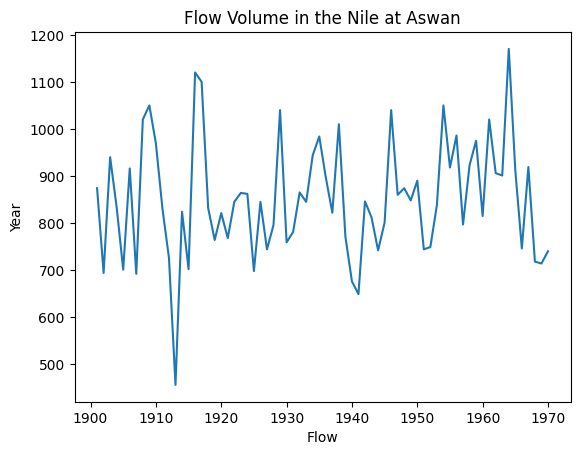

In [15]:
# Load the data from Github
nile_url = "https://raw.githubusercontent.com/alan-turing-institute/TCPD/e8f19a3635e3b7f1a8aff59ce7f4d9bea17525c0/datasets/nile/nile.json"
nileresponse = requests.get(nile_url)
nile_data = json.loads(nileresponse.text)

# Change the imported dict into a list (bad code alert)
time_values = nile_data["time"]
time_values = time_values["raw"]
flow_values = nile_data["series"]
flow_values = flow_values[0]
flow_values = flow_values["raw"]

# Change datatype and convert to DF 
nile_df = pd.DataFrame({
    "Year": time_values,
    "Flow": flow_values
})
nile_df["Year"] = pd.to_numeric(nile_df["Year"])
nile_df = nile_df[(nile_df["Year"] > 1900 ) & (nile_df["Year"] <= 1970)]
print(nile_df.head)

plt.plot(nile_df["Year"], nile_df["Flow"])
plt.xlabel("Flow")
plt.ylabel("Year")
plt.title("Flow Volume in the Nile at Aswan")
plt.savefig("Nile")

## Sourcing the second dataset: the number of home runs in the American League of baseball
Very similar process as it is another json from the same github repo 

<bound method NDFrame.head of     Year  Homeruns
0   1901       228
1   1902       258
2   1903       184
3   1904       156
4   1905       156
..   ...       ...
65  1966      1365
66  1967      1197
67  1968      1104
68  1969      1649
69  1970      1746

[70 rows x 2 columns]>


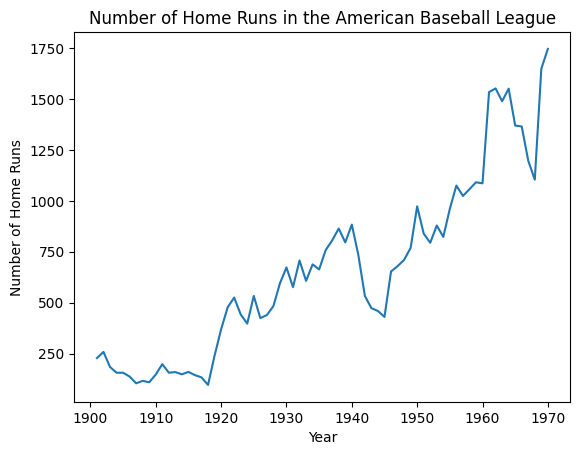

In [16]:
# Load the data from Github
baseball_url = "https://raw.githubusercontent.com/alan-turing-institute/TCPD/refs/heads/master/datasets/homeruns/homeruns.json"
baseballresponse = requests.get(baseball_url)
baseball_urldata = json.loads(baseballresponse.text)

# Change the imported dict into a list (bad code alert)
baseball_year = baseball_urldata["time"]
baseball_year = baseball_year["raw"]
homeruns = baseball_urldata["series"]
homeruns = homeruns[0]
homeruns = homeruns["raw"]

# Change datatype and convert to DF 
baseball_df = pd.DataFrame({
    "Year": baseball_year,
    "Homeruns": homeruns
})
baseball_df["Year"] = baseball_df["Year"].astype(int)
baseball_df["Year"] = pd.to_numeric(baseball_df["Year"])
baseball_df = baseball_df[0:100]
baseball_df = baseball_df[(baseball_df["Year"] > 1900) & (baseball_df["Year"] <= 1970)]
print(baseball_df.head)

#create a graph for fun
plt.plot(baseball_df["Year"], baseball_df["Homeruns"])
plt.xlabel("Year")
plt.ylabel("Number of Home Runs")
plt.title("Number of Home Runs in the American Baseball League")
plt.savefig("Baseball")

## Combine the two into a final dataframe 

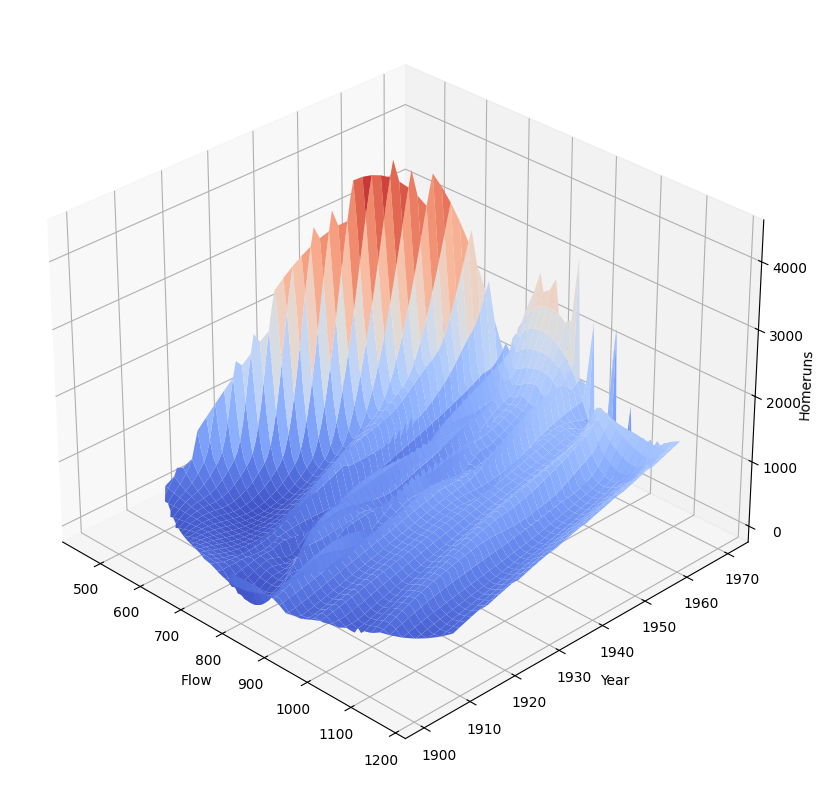

In [18]:
nile_baseball_df = pd.merge(nile_df, baseball_df, on ="Year")
nile_baseball_df.to_csv("nile_baseball_df", sep='\t', encoding='utf-8', index=False)

#while the DF is done the interesting part is the surface

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
x = nile_baseball_df["Flow"]
y = nile_baseball_df["Year"]
z = nile_baseball_df["Homeruns"]

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
X, Y= np.meshgrid(xi, yi)

Z = griddata((x, y), z, (X, Y), method='cubic')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel('Flow')
ax.set_ylabel('Year')
ax.set_zlabel('Homeruns',labelpad=0)
ax.view_init(elev=30, azim=-45)
plt.tight_layout()
plt.savefig("Baseball-Nile")
